In [1]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [3]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
reg.score(x_test,y_test)

0.7263451459702503

In [5]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
pca = PCA(n_components=10, whiten='True')
x = pca.fit(df_x).transform(df_x)

In [7]:
pca.explained_variance_

array([3.08899113e+04, 6.25033006e+03, 8.18363958e+02, 2.66684838e+02,
       4.98315275e+01, 2.78767934e+01, 1.60633859e+01, 9.52731770e+00,
       3.27333185e+00, 1.18094181e+00])

In [8]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.score(x_test,y_test)

0.6901733717990524

In [10]:
svd = TruncatedSVD(n_components = 10)
x = svd.fit(df_x).transform(df_x)
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.score(x_test,y_test)

0.6822252753655191

In [12]:
df_x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [13]:
data=pd.read_csv('mnist.csv')

In [14]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
pred = rf.predict(x_test)

In [18]:
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1

In [19]:
count/float(len(pred))

0.9656666666666667

In [20]:
pca = PCA(n_components=25, whiten='True')
x = pca.fit(df_x).transform(df_x)
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1

In [21]:
count/float(len(pred))

0.9459166666666666

In [22]:
pca.explained_variance_

array([332724.66744657, 243283.9390705 , 211507.36705827, 184776.38586219,
       166926.83131066, 147844.96167532, 112178.20271134,  98874.42962091,
        94696.24905274,  80809.82453001,  72313.61950665,  69358.30123914,
        58826.8691125 ,  58014.07873768,  54123.75414644,  50843.01062325,
        45412.59099971,  43778.45567982,  40705.28298798,  39519.48074006,
        36553.10658095,  34513.87834344,  32689.27925253,  31286.30953469,
        30239.05924941])

In [23]:
pca = PCA(n_components=2, whiten='True')
x = pca.fit(df_x).transform(df_x)
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1

In [24]:
count/float(len(pred))

0.4176666666666667

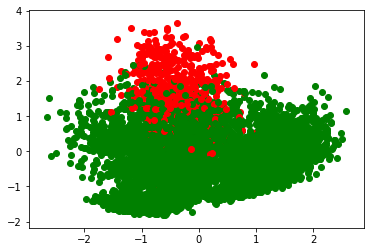

In [25]:
y = df_y.values
for i in range(5000):
    if y[i]==0:
        plt.scatter(x[i,1],x[i,0],c='r')
    else:
        plt.scatter(x[i,1],x[i,0],c='g')
plt.show()